In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
import spacy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
!pip install spacy

     ---------------------------------------- 11.8/11.8 MB 8.4 MB/s eta 0:00:00
     -------------------------------------- 450.1/450.1 KB 9.6 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 7.2 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 KB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 112.4/112.4 KB ? eta 0:00:00
     ---------------------------------------- 42.8/42.8 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 KB ? eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 9.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Subhash\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install WordCloud

     -------------------------------------- 153.1/153.1 KB 2.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Subhash\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
# Data Exploration and Preprocessing/Preparation

In [7]:
df = pd.read_csv('cyberbullying_tweets.csv')

In [8]:
df.head()

tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

In [9]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [10]:
'''Function to clean the tweets for futher analyses'''
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stopwords.extend(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 
                      've', 'u', 'ur', 'don', 't', 's'])
def clean_tweet(tweet):
    clean_text = re.sub(TEXT_CLEANING_RE, ' ', tweet)
    clean_text = clean_text.lower()
    clean_text = ' '.join([word for word in nltk.word_tokenize(clean_text) 
                           if word not in stopwords])
    return clean_text

In [11]:
tweet = '''Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc'''
print(clean_tweet(tweet))

aussietv white theblock imacelebrityau today sunrise studio10 neighbours wonderlandten etc


In [12]:
df['clean_tweets'] = df['tweet_text'].apply(clean_tweet)

In [13]:
df.head()

tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                        clean_tweets  
0                words katandandre food crapilicious  
1  aussietv white theblock imacelebrityau today s...  
2                   classy whore red velvet cupcakes  
3  meh p thanks heads concerned another angry dud...  
4  isis account pretending kurdish account like i...

In [14]:
df.to_csv('processed_tweets.csv', index=False)

In [15]:
'''Word Lemmatization'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_tweets(tweet):
    lemmatized_tweets = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split(' ')])
    return lemmatized_tweets

In [16]:
df['lemmatized_tweets'] = df['clean_tweets'].apply(lemmatize_tweets)

In [17]:
df.head()

tweet_text cyberbullying_type  \
0  In other words #katandandre, your food was cra...  not_cyberbullying   
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying   
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying   
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying   
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying   

                                        clean_tweets  \
0                words katandandre food crapilicious   
1  aussietv white theblock imacelebrityau today s...   
2                   classy whore red velvet cupcakes   
3  meh p thanks heads concerned another angry dud...   
4  isis account pretending kurdish account like i...   

                                   lemmatized_tweets  
0                 word katandandre food crapilicious  
1  aussietv white theblock imacelebrityau today s...  
2                    classy whore red velvet cupcake  
3  meh p thanks head concerned another angry dude...  
4  isi account pretending kurdish account like is...

In [14]:
# WordCloud Analysis by type of Cyberbullying

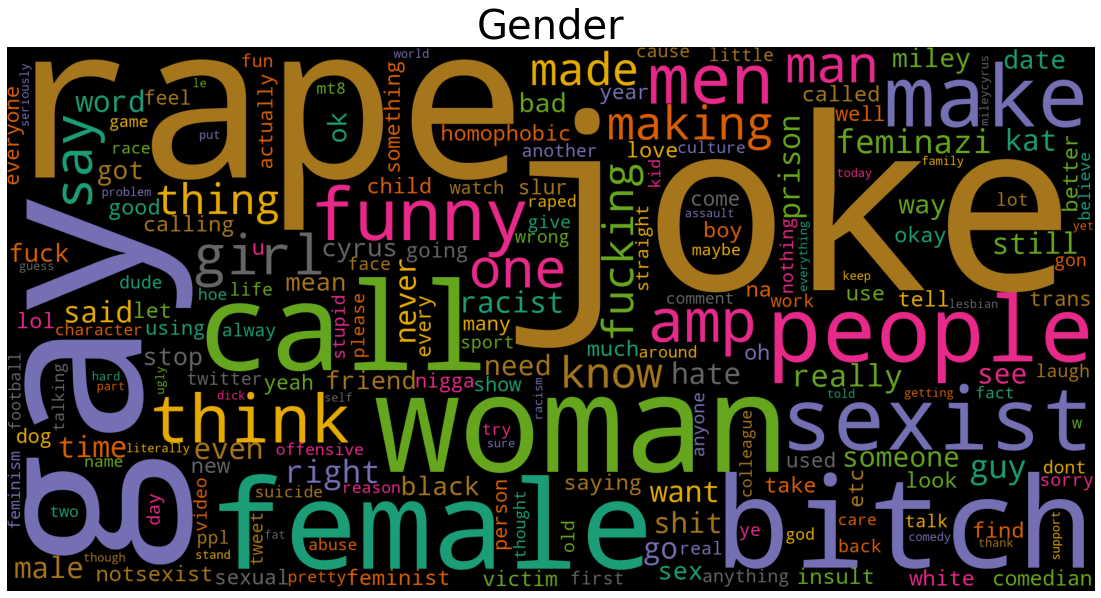

In [18]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='gender']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

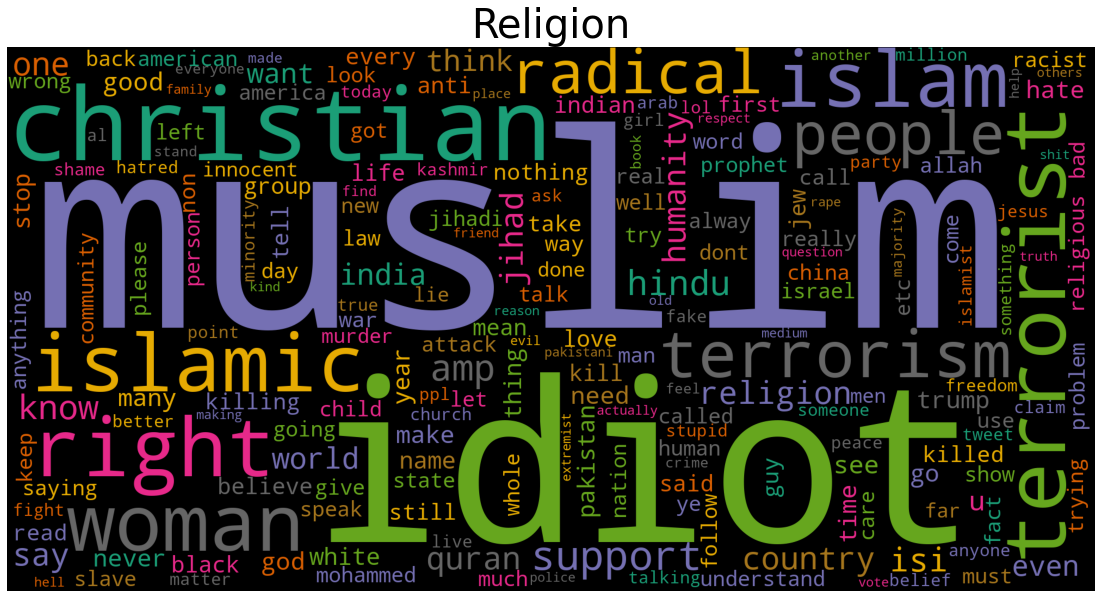

In [16]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='religion']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud1)

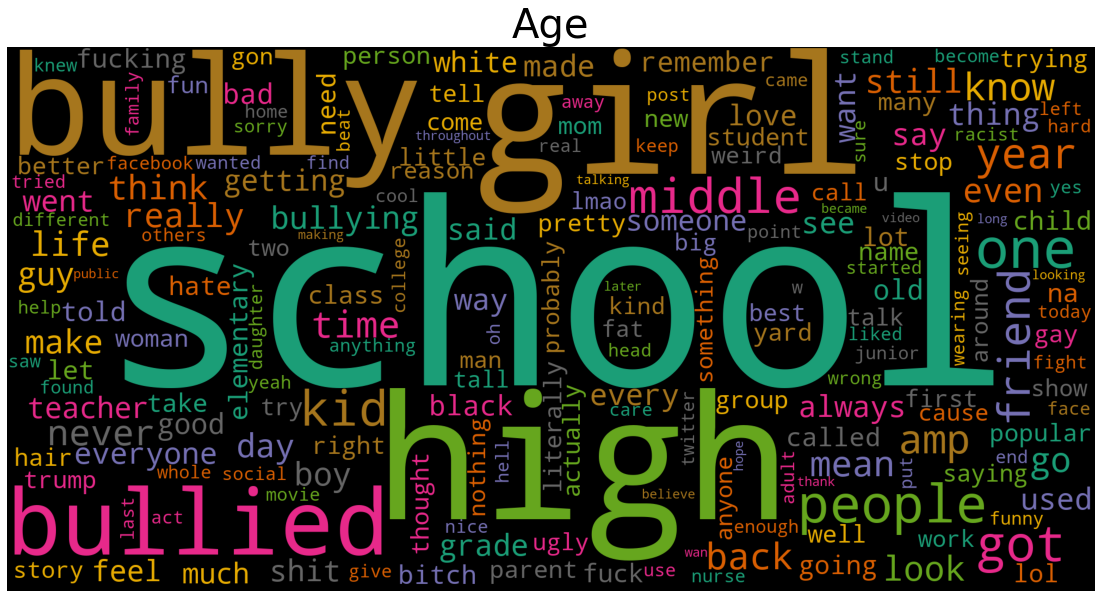

In [17]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='age']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False, 
                 width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud1)

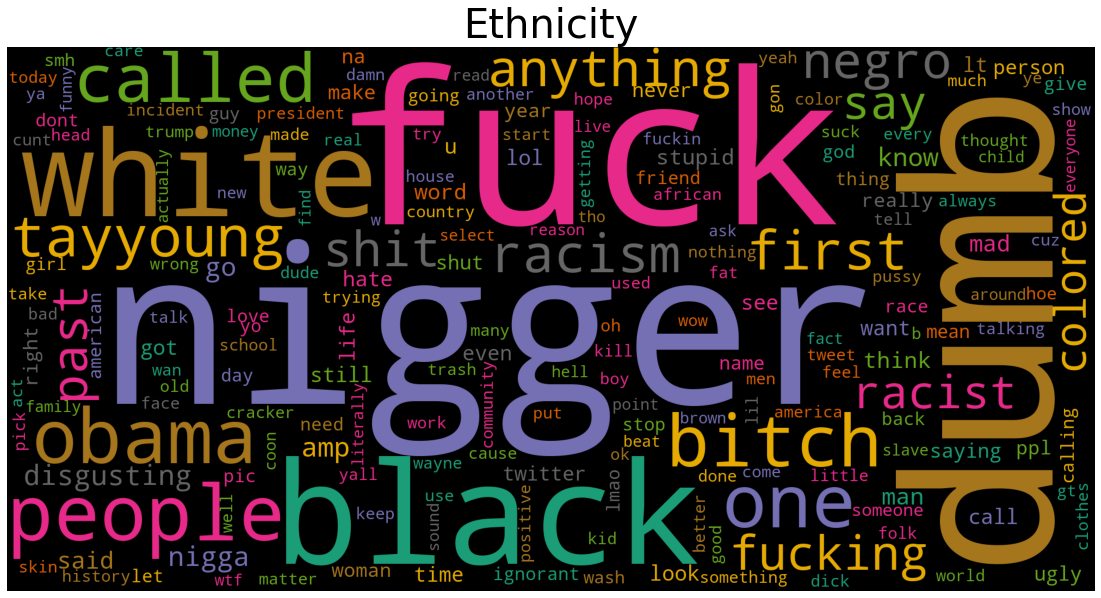

In [18]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='ethnicity']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud1)

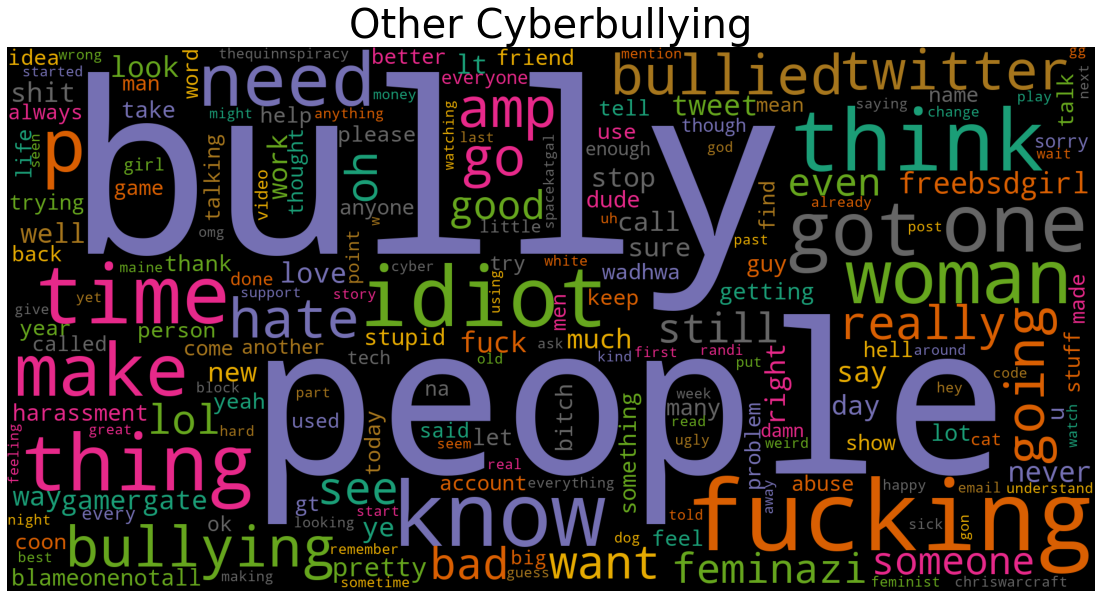

In [24]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='other_cyberbullying']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Other Cyberbullying",fontsize=40)
plt.imshow(cloud1)

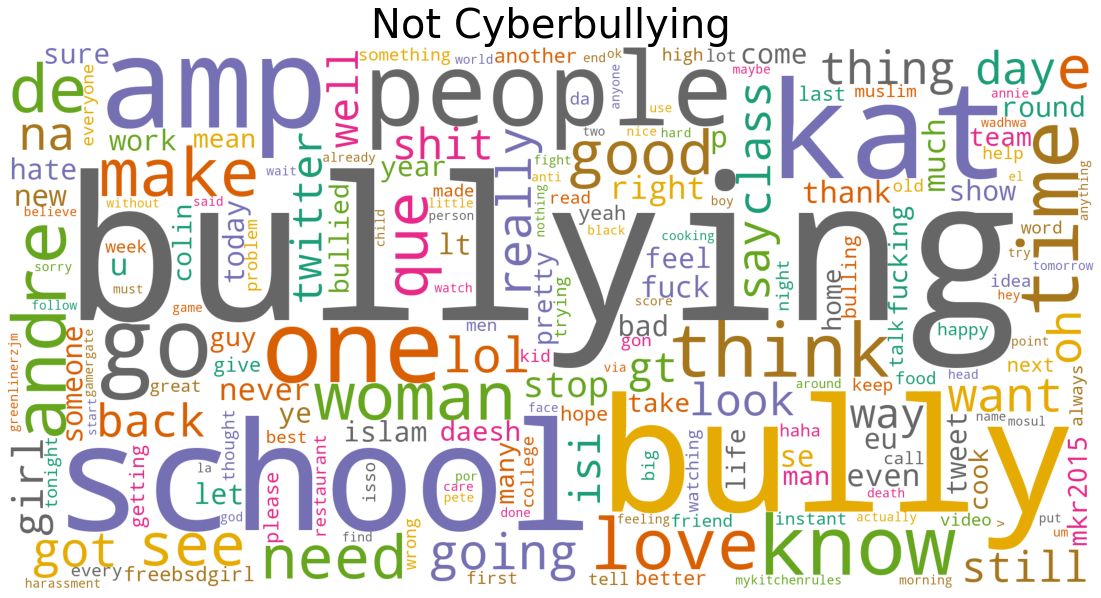

In [25]:
plt.figure(figsize=(20,10))
subset1 = df[df['cyberbullying_type']=='not_cyberbullying']
text_gender = subset1.lemmatized_tweets.values
cloud1 = WordCloud(background_color='white',colormap="Dark2",collocations=False,
                   width=2000,height=1000).generate(" ".join(text_gender))
plt.axis('off')
plt.title("Not Cyberbullying",fontsize=40)
plt.imshow(cloud1)

In [26]:
def plot_figure(parameter):
    plt.figure(figsize=(20,10))
    subset1 = df[df['cyberbullying_type']==parameter]
    text_gender = subset1.lemmatized_tweets.values
    cloud1 = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                       width=2000,height=1000).generate(" ".join(text_gender))
    plt.axis('off')
    plt.title(parameter,fontsize=40)
    plt.imshow(cloud1)

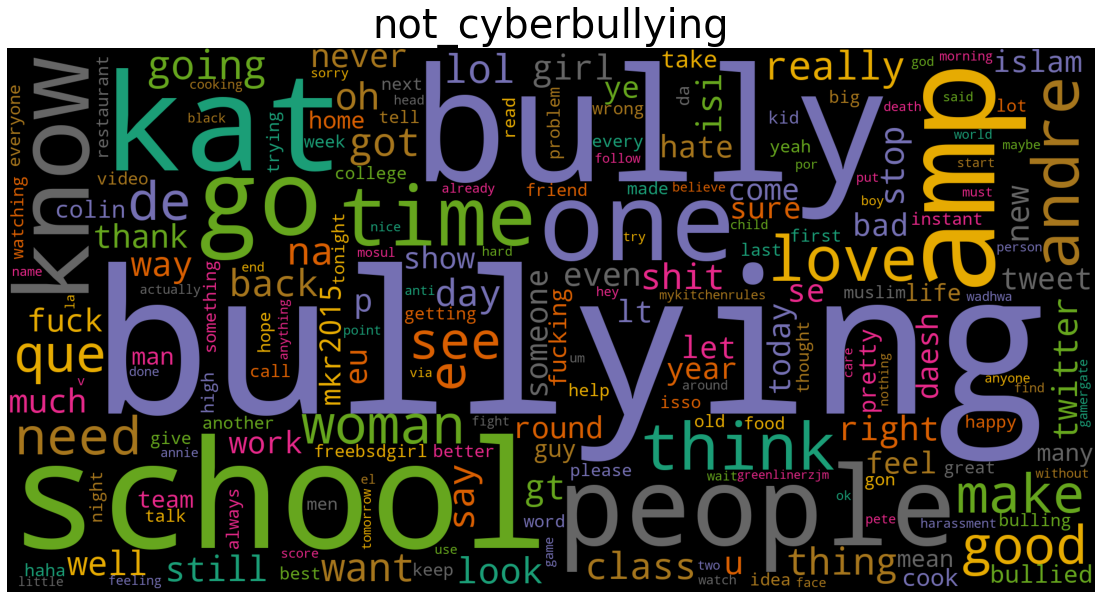

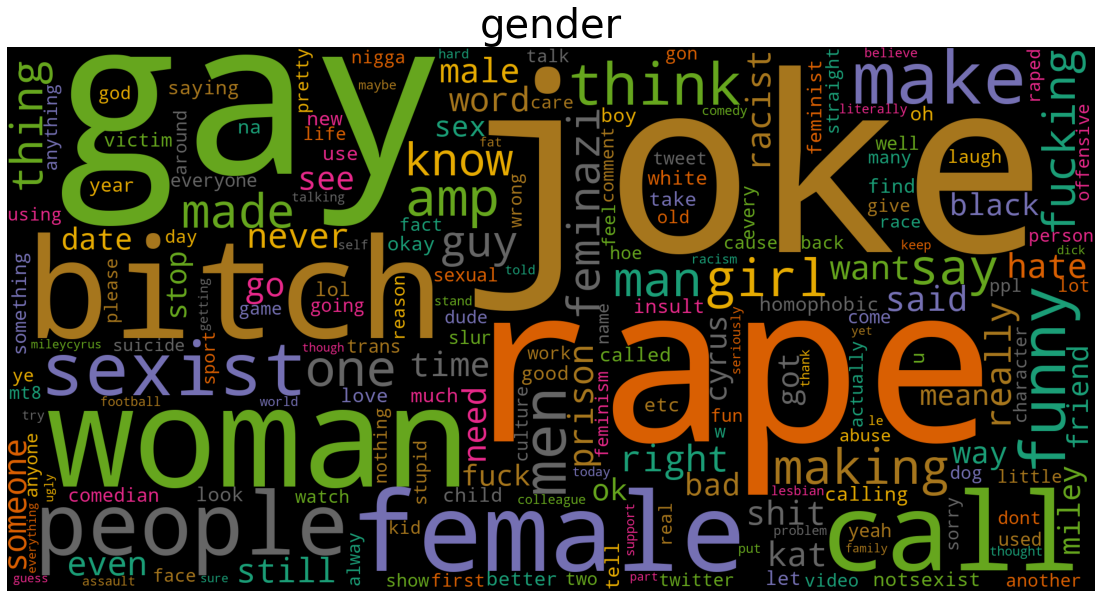

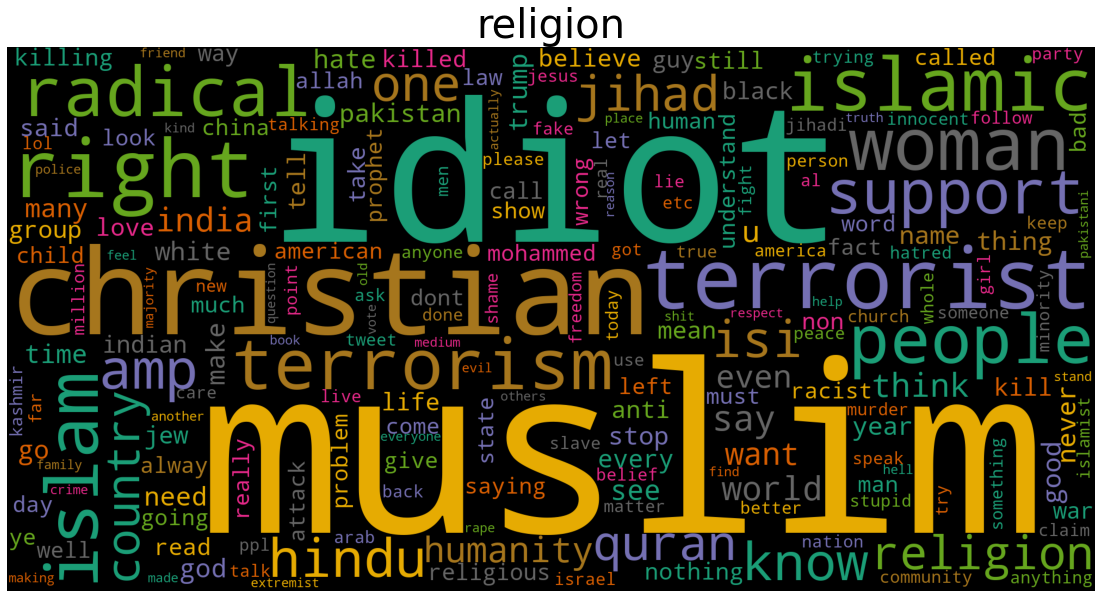

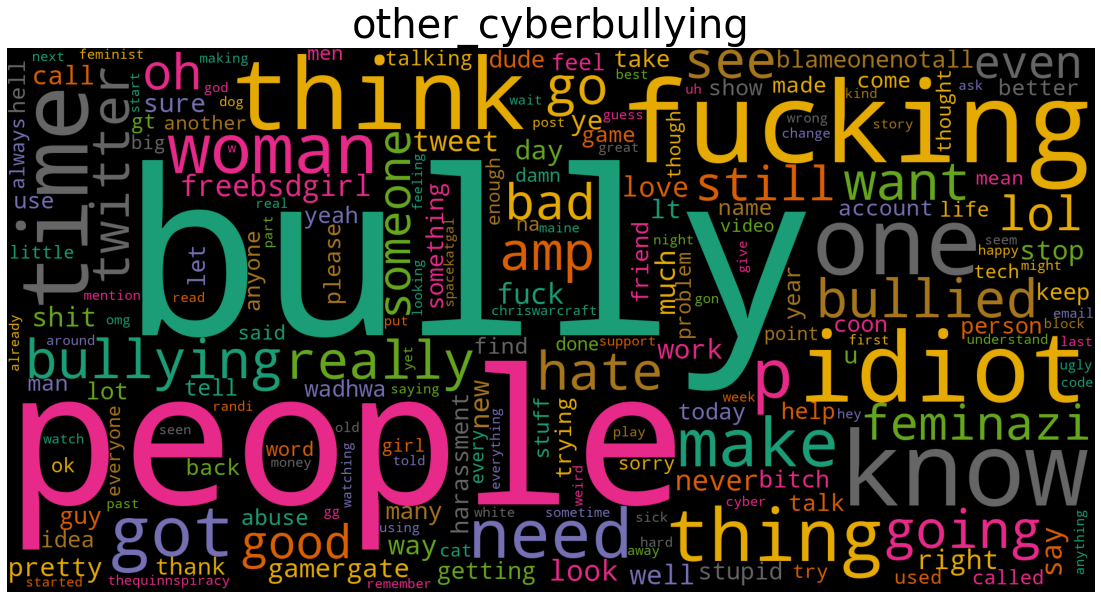

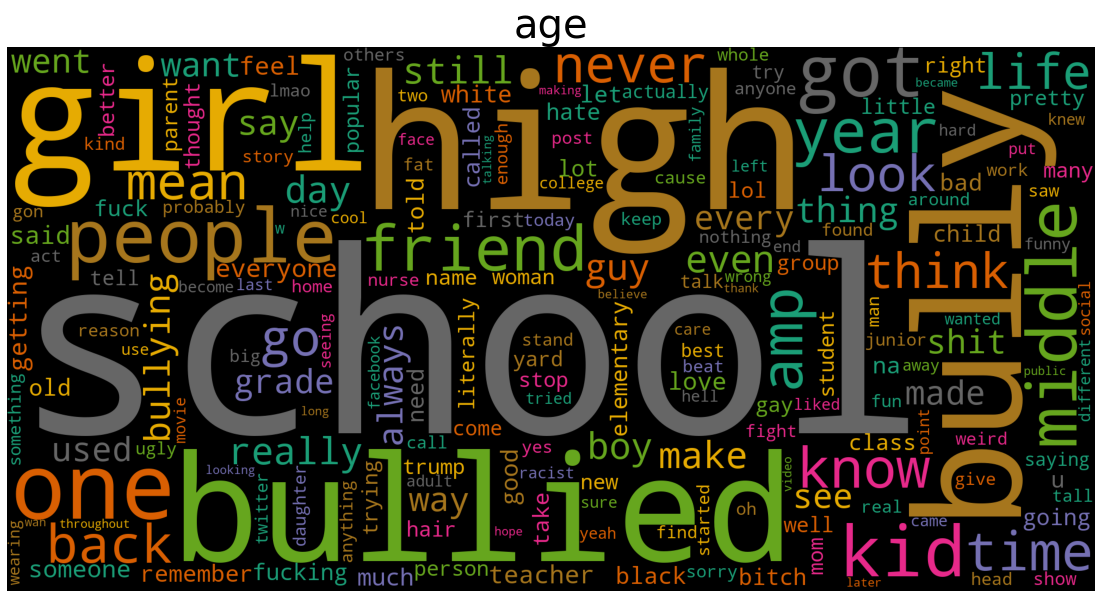

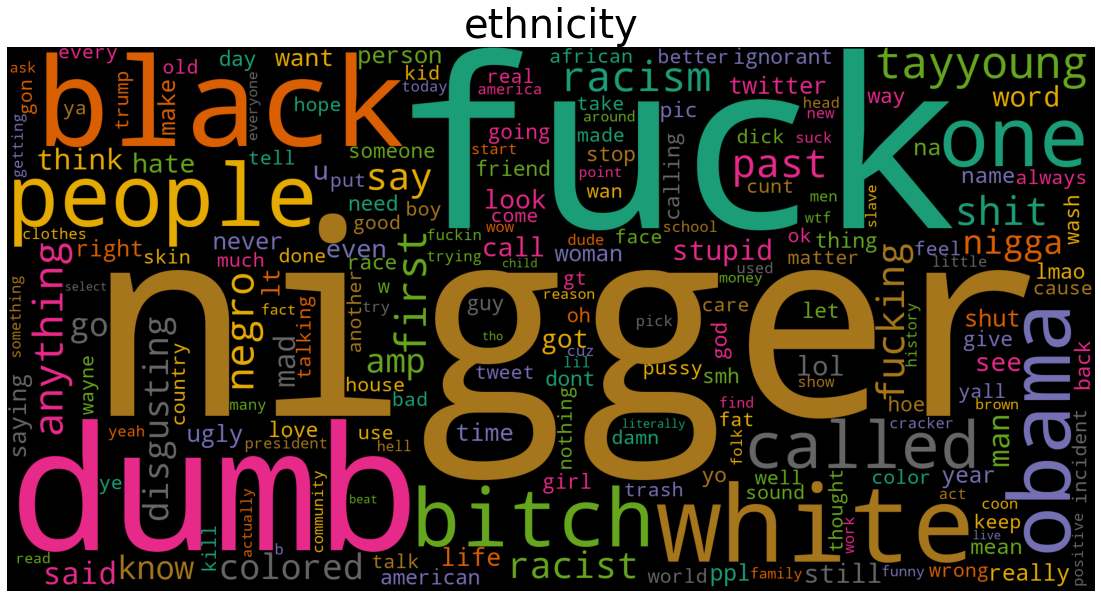

In [27]:
parameters = list(df['cyberbullying_type'].unique())
for parameter in parameters:
    plot_figure(parameter)